In [2]:
#import modules
import rasterio
import os
from matplotlib import pyplot as plt
import xarray as xr

In [3]:
import datacube
from datacube.storage import masking
from datacube import Datacube
from datetime import datetime
from skimage import exposure

#from datacube_stats.statistics import GeoMedian
import matplotlib as mpl
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
import random

#import datacube_stats

# Replace '156' and 'cek156' with the path to your own home directory on the VDI
#s2aws = Datacube(config='/home/547/ck9738/datacube-s2.conf')

In [4]:
# set working folder
os.chdir('/g/data/r78/ck9738')

In [5]:
#define DLCD colour map

DLCD_cmap = mpl.colors.ListedColormap([
'xkcd:black',
'xkcd:grey',
'xkcd:black',
'xkcd:medium blue',
'xkcd:robin egg blue',
'xkcd:plum',
'xkcd:pink purple',
'xkcd:raspberry',
'xkcd:old pink',
'xkcd:pale pink',
'xkcd:warm pink',
'xkcd:tealish',
'xkcd:black',
'xkcd:black',
'xkcd:pumpkin orange',
'xkcd:white',
'xkcd:yellow',
'xkcd:black',
'xkcd:apricot',
'xkcd:eggshell',
'xkcd:black',
'xkcd:black',
'xkcd:black',
'xkcd:black',
'xkcd:umber',
'xkcd:tan',
'xkcd:black',
'xkcd:black',
'xkcd:black',
'xkcd:black',
'xkcd:black',
'xkcd:deep green', 
'xkcd:medium green',
'xkcd:light sage',
'xkcd:slime green',
'xkcd:light grey'])

#cmap = mpl.colors.ListedColormap(['xkcd:pale peach', 'xkcd:plum purple', 'xkcd:black', 'xkcd:grey', 'xkcd:medium blue'])
#cmap = mpl.colors.BoundaryNorm(vals, cmapo.N)                          


In [6]:
#import datacube
dc = datacube.Datacube()

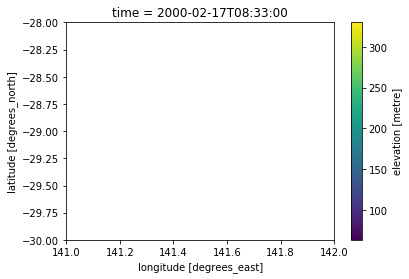

In [7]:
dsm = dc.load(product='dsm1sv10', lon=(141.00, 142.00), lat=(-28.0, -30.0))

dsm.elevation.plot()

In [8]:
import xarray, rasterio, numpy as np
def numpy_to_xarray(array, geobox, name=None):
    """Utility to convert ndarray to DataArray, using a datacube.model.GeoBox"""
    coords=[xarray.Coordinate(x, geobox.coords[x].values, attrs=dict(units=geobox.coords[x].units)) 
            for x in geobox.dims]
    return xarray.DataArray(array, coords=coords, attrs=dict(crs=geobox.crs), name=name)

def geopandas_to_xarray(table, geobox, name=None):
    """Rasterise (with reprojection)"""
    array = rasterio.features.rasterize(shapes=table.to_crs(geobox.crs._crs.ExportToProj4()).geometry,
                                        out_shape=(geobox.height, geobox.width),
                                        transform=geobox.affine)
    return numpy_to_xarray(array, geobox, name)

def rasterfile_to_xarray(file, geobox, name=None, nodata=True, num_bands=(1), X_band= 1):
    """Blit like
    """
    with rasterio.open(file) as src:

        assert src.indexes == num_bands # assume single band
        band = rasterio.band(src, X_band) # do not attempt to read entire extent into memory
        array = np.empty((geobox.height, geobox.width), dtype=band.dtype)
        rasterio.warp.reproject(source=band,
                                destination=array,
                                dst_crs=geobox.crs.crs_str,
                                dst_transform=geobox.affine,
                                dst_nodata=nodata)
    return numpy_to_xarray(array, geobox, name)

def load_gfif_full(file_name, x=1):


    dataset = rasterio.open(file_name) #open using Raterio
    {i: dtype for i, dtype in zip(dataset.indexes, dataset.dtypes)}
    data_array = dataset.read(x) #read selected band into np array
    data_xr = xr.DataArray(data_array) #turn into Xr array for fuctionality #Now don't need xr yet
    return(data_xr) #return np array into program 

In [9]:
dsm.geobox

GeoBox(3601, 7201, Affine(0.00027777777777999627, 0.0, 140.99972222335023,
       0.0, -0.0002777777777800002, -27.99972222244622), EPSG:4326)

In [10]:
old_DLCD_stack = {}
band_list = (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14)
for i in band_list:
    dataset = rasterfile_to_xarray("old_DLCD/DLCDv2_Comp_old.tif", dsm.geobox,
                                   num_bands=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14), X_band= i)
    dataset.coords['year'] = i 
    name = 'band '+str(i)
    
    old_DLCD_stack[name] = dataset
    
old_DLCD_ord = xr.concat(old_DLCD_stack.values(), 'year')
old_DLCD_ord = old_DLCD_ord.sortby('year')

/g/data/v10/public/modules/dea-env/20190329/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: Coordinate has been deprecated. Use IndexVariable instead.
  """


In [11]:
new_DLCD_stack = {}
band_list = (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14)
for i in band_list:
    dataset = rasterfile_to_xarray("new_DLCD/DLCDv2_2016_new.tif", dsm.geobox,
                                   num_bands=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15), X_band=i)
    dataset.coords['year'] = i
    name = 'band '+str(i)
    
    new_DLCD_stack[name] = dataset
    
new_DLCD_ord = xr.concat(new_DLCD_stack.values(), 'year')
new_DLCD_ord = new_DLCD_ord.sortby('year')

/g/data/v10/public/modules/dea-env/20190329/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: Coordinate has been deprecated. Use IndexVariable instead.
  """


In [12]:
values_please = np.unique(old_DLCD_ord)
values_please

array([ 3,  4, 11, 14, 16, 18, 19, 24, 25, 32, 33, 34], dtype=uint8)

In [13]:
new_DLCD_ord.shape[1]

7201

In [14]:
new_DLCD_2001 = new_DLCD_ord.isel(year = 0)


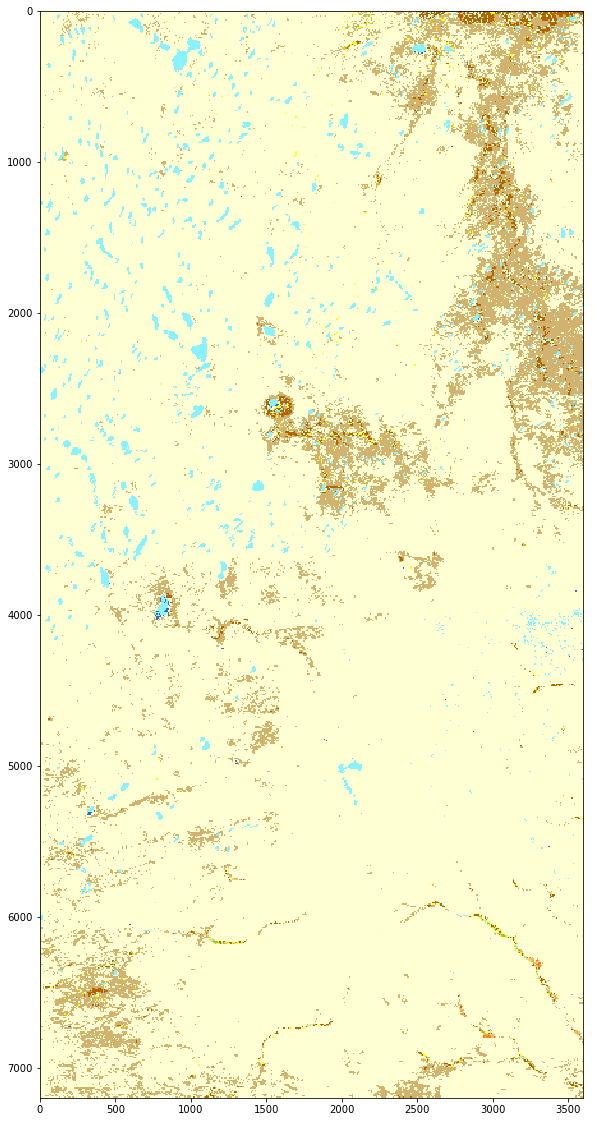

In [15]:
fig, ax = plt.subplots(figsize = (20,20))
cax = ax.imshow(new_DLCD_2001, cmap = DLCD_cmap)
cax.set_clim(0, 35)
#plt.show()

In [16]:
new_DLCD_2001

<xarray.DataArray (latitude: 7201, longitude: 3601)>
array([[19, 19, 19, ..., 24, 24, 24],
       [19, 19, 19, ..., 24, 24, 24],
       [19, 19, 19, ..., 19, 19, 19],
       ...,
       [19, 19, 19, ..., 19, 19, 19],
       [19, 19, 19, ..., 19, 19, 19],
       [19, 19, 19, ..., 19, 19, 19]], dtype=uint16)
Coordinates:
  * latitude   (latitude) float64 -28.0 -28.0 -28.0 -28.0 ... -30.0 -30.0 -30.0
  * longitude  (longitude) float64 141.0 141.0 141.0 141.0 ... 142.0 142.0 142.0
    year       int64 1
Attributes:
    crs:      EPSG:4326

def count_overlap_array(old_np,A,new_np,B):
    raw_np = np.ones_like(old_np) #generate a np with the same size as the dlcd but full of 1 values
    raw_xr = xr.DataArray(raw_np) #turn to xarray for it's useful fuctionality
    count_old = raw_xr.where(old_np==A) # make an xr where 1= presance of class A, 0= absence 
    count_new = count_old.where(new_np==B) # make an xr where 1= overlap of classes A&B
    count_class = count_new.fillna(0) #replaces all the nan with 0
    howmuch_name = np.count_nonzero(count_class) #counts the number of non 0 in the xaray


    return(count_class) #returns an array

test_array= count_overlap_array(new_DLCD_2001,8,old_DLCD_2001,33)

In [17]:
rand_point_list = []

rise=new_DLCD_ord.shape[1]-1
run=new_DLCD_ord.shape[2]-1

for x in range(1000):
    tup=(random.randint(1,run),random.randint(1,rise))
    
    rand_point_list.append(tup)
print(rand_point_list)

[(65, 1217), (2271, 3585), (2282, 7028), (2662, 668), (337, 2629), (640, 617), (1734, 3904), (3092, 3444), (683, 4137), (1999, 71), (1261, 3248), (2047, 6758), (1963, 4697), (3097, 1483), (1502, 5731), (31, 5064), (2017, 4152), (695, 2980), (41, 5012), (2816, 2491), (1613, 6016), (439, 3076), (2256, 3959), (3269, 5990), (2958, 6113), (3206, 6794), (1792, 5452), (71, 651), (2635, 1301), (1228, 7037), (1710, 3183), (2528, 3488), (3150, 955), (3215, 3233), (2548, 3183), (65, 4113), (3176, 714), (1003, 972), (754, 6130), (3011, 5451), (2903, 736), (3163, 4497), (1703, 2610), (1941, 6435), (168, 4084), (444, 5657), (1759, 6838), (1836, 6987), (3007, 1407), (3137, 6210), (291, 5611), (1410, 5813), (2492, 6379), (609, 4185), (2316, 6105), (2289, 4551), (377, 6610), (2171, 2749), (2245, 1098), (3581, 3862), (1382, 2662), (2565, 7117), (1686, 3085), (53, 6042), (1897, 4802), (234, 5195), (1676, 6531), (1743, 3455), (2097, 3134), (3200, 6212), (1132, 559), (1984, 5780), (31, 6018), (2678, 4786),

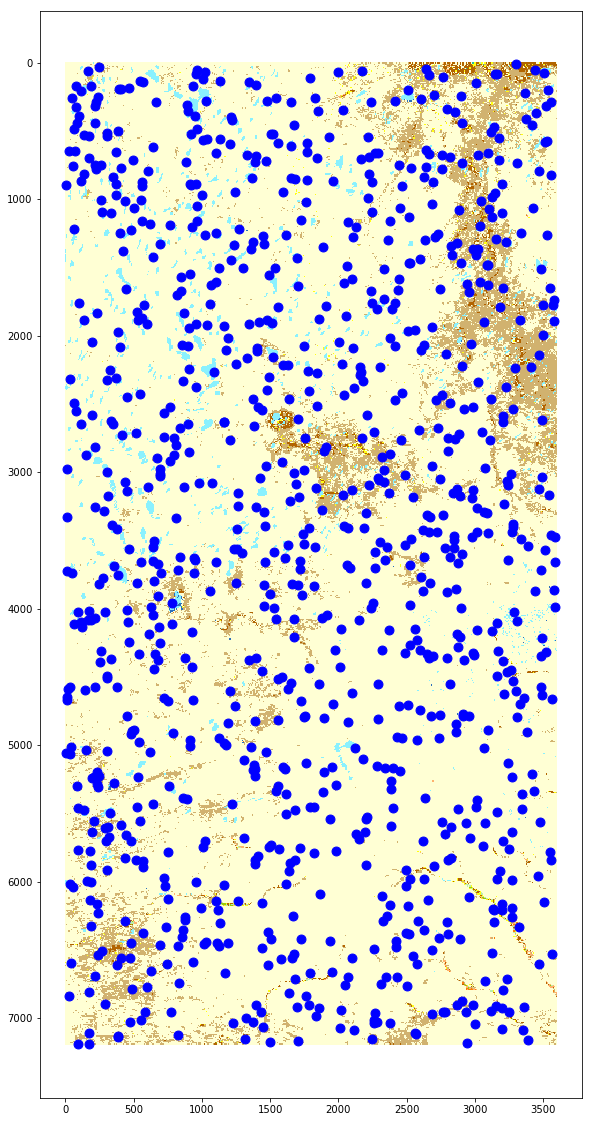

In [18]:
fig, ax = plt.subplots(figsize = (20,20))
cax = ax.imshow(new_DLCD_2001, cmap = DLCD_cmap)
plt.scatter(*zip(*rand_point_list),c='B', s=80)
cax.set_clim(0, 35)
#plt.show()

In [19]:
#final_table =dict()

New_DLCD_dit = dict()
Old_DLCD_dit = dict()

count = 0

for x,y in rand_point_list:

    
    if x > 0:
        #set up lat-long for ndwi/redlight rill to cycle through pot/landslide events lits
        tup_x = int(x)
        tup_y = int(y)
        #set up stuff for file output nameing
        x_string = str(tup_x)
        y_string = str(tup_y)
        count = count+1
        #count_val = str(count)
        #name_val = 'point # '+count_val
        title_string = 'x= ' + x_string + ', y= '+ y_string

        #prepare ndwi7 vis light record for single point over epoc
        pd_new = new_DLCD_ord.isel(latitude=tup_y,longitude=tup_x)
        pd_old = old_DLCD_ord.isel(latitude=tup_y,longitude=tup_x)
        new_np = np.array(pd_new)
        old_np = np.array(pd_old)

        New_DLCD_dit[count] = new_np
        Old_DLCD_dit[count] = old_np
        
        #pd_new.plot.line('r-^')
        #pd_old.plot.line('b-^')
        #plt.show()
        #plt.close()
        
        

In [20]:
new_years=[2001, 2002 ,2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014]
old_years=[2001, 2002 ,2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014]

new_DLCD_panda = pd.DataFrame(New_DLCD_dit, index = new_years)
old_DLCD_panda = pd.DataFrame(Old_DLCD_dit, index = old_years)
new_DLCD_panda

,1,2,3,4,5,6,7,8,9,10,...,991,992,993,994,995,996,997,998,999,1000
2001,25,19,19,19,19,19,19,19,19,19,...,19,19,19,4,19,19,4,19,19,19
2002,19,19,19,19,19,19,19,19,19,19,...,19,19,19,4,19,19,4,19,19,19
2003,19,19,19,19,19,19,19,19,19,19,...,19,19,19,4,19,19,4,19,19,19
2004,19,19,19,19,19,19,19,19,19,19,...,19,19,19,4,19,19,4,19,19,19
2005,19,19,19,19,19,19,19,19,19,19,...,19,19,19,4,19,19,4,19,19,19
2006,19,19,19,19,19,19,19,19,19,19,...,19,19,25,4,19,19,4,19,19,19
2007,19,19,19,19,19,19,19,19,19,19,...,19,19,25,4,19,19,4,25,19,19
2008,19,19,19,19,19,19,19,19,19,19,...,19,19,19,4,19,19,4,25,19,19
2009,19,19,19,19,19,19,19,19,19,19,...,19,19,19,4,19,19,4,16,19,19
2010,19,19,19,19,19,19,16,19,19,19,...,19,19,19,4,19,19,4,16,19,19


In [21]:
old_DLCD_panda

,1,2,3,4,5,6,7,8,9,10,...,991,992,993,994,995,996,997,998,999,1000
2001,25,19,19,19,19,19,19,19,19,19,...,19,19,19,4,19,19,4,19,19,19
2002,19,19,19,19,19,19,19,19,19,19,...,19,19,19,4,19,19,4,19,19,19
2003,19,19,19,19,19,19,19,19,19,19,...,19,19,19,4,19,19,4,19,19,19
2004,19,19,19,19,19,19,19,19,19,19,...,19,19,19,4,19,19,4,19,19,19
2005,19,19,19,19,19,19,19,19,19,19,...,19,19,19,4,19,19,4,19,19,19
2006,19,19,19,19,19,19,19,19,19,19,...,19,19,25,4,19,19,4,19,19,19
2007,19,19,19,19,19,19,19,19,19,19,...,19,19,25,4,19,19,4,25,19,19
2008,19,19,19,19,19,19,19,19,19,19,...,19,19,19,4,19,19,4,25,19,19
2009,19,19,19,19,19,19,19,19,19,19,...,19,19,19,4,19,19,4,16,19,19
2010,19,19,19,19,19,19,16,19,19,19,...,19,19,19,4,19,19,4,16,19,19


In [22]:
#new_DLCD_panda.to_csv('/g/data/r78/ck9738/DLCD_rand_samples/new_panda.csv')
#old_DLCD_panda.to_csv('/g/data/r78/ck9738/DLCD_rand_samples/old_panda.csv')